In [16]:
import networkx as nx
# import similarity
from nltk.tokenize import word_tokenize
import numpy as np
# import miscellaneous as ms
import itertools
import matplotlib.pyplot as plt

similarity

In [11]:
import math
import json

#idf score calculation
def calc_idf(word_tokens, words, N):
    dict = {}
    for word in words:
        for sent in word_tokens:
            if word in sent:
                if word in dict.keys():
                    dict[word] += 1

                else:
                    dict[word] = 1
    for word, count in dict.items():
        dict[word] = math.log((N/float(count)))
    with open("idfBg","w") as f:
        json.dump(dict, f)
    return dict

#centrality score calculation
def idf_modified_cosine(x, y, idf):
    try:
        sum = 0
        combine = x + y
        for word in combine:
            tf1, tf2 = x.count(word), y.count(word)
            sum += int(tf1) * int(tf2) * float((idf[word] ** 2))
            total1, total2 = 0, 0
        for word in x:
            tf = x.count(word)
            total1 += int(tf) * float(idf[word])
        for word in y:
            tf = y.count(word)
            total2 += int(tf) * float(idf[word])
        deno = (math.sqrt((total1**2))) * (math.sqrt((total2**2)))
        return float(sum)/deno
    except Exception as e:
        pass


#for investigation puspose
def get_similarity_matrix(word_tokens, idf):
    matrix = []
    for sent1 in word_tokens:
        row = []
        for sent2 in word_tokens:
            sim = idf_modified_cosine(sent1, sent2, idf)
            row.append(sim)
        matrix.append(row)
    return matrix

miscellaneous

In [12]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag

#To tokenize 
def tokenize(data):
    sent_tokens = sent_tokenize(data)
    word_tokens = [word_tokenize(sent) for sent in sent_tokens]
    return sent_tokens, word_tokens
#word_tokenize the data; for idf calculation
def get_words(data):
    words = word_tokenize(data)
    return words


In [48]:
#The graph is built using the similarity scores obtained from the idf_modified_cosine() method
#
def build_graph(nodes, threshold, idf):
    gr = nx.Graph() #initialize an undirected graph
    gr.add_nodes_from(nodes)
    nodePairs = list(itertools.combinations(nodes, 2))

    #add edges to the graph (weighted by cosine similarity)
    for pair in nodePairs:
        node1 = pair[0]
        node2 = pair[1]
        simval = idf_modified_cosine(word_tokenize(node1), word_tokenize(node2), idf)
#         print('Printing weights')
#         print(node1, node2, simval)
#         if simval > threshold:
        gr.add_edge(node1, node2, weight=simval)
    
    pos=nx.spring_layout(gr)
    nx.draw(gr, pos)
    plt.show()
    print(gr.edges())
    return gr

#would have used this method if not for nx.pagerank
'''
def get_Bij(gr):
    A = nx.adjacency_matrix(gr, None, weight='weight')
    A = A.toarray()
    B = []
    row_sum = np.sum(A, axis=1)
    it = 0
    for row in A:
        r = []
        for ele in row:
            r.append(ele/row_sum[it])
        it += 1
        B.append(r)
'''

#key sentences are obtained
def get_keysentences(graph):
    # weight is the similarity value obtained from the idf_modified_cosine
    calculated_page_rank = nx.pagerank(graph, weight='weight')
    print(calculated_page_rank)
    #most important words in ascending order of importance
    keysentences = sorted(calculated_page_rank, key=calculated_page_rank.get, reverse=False)
    return keysentences

Printing similarity matrix:
 [[0.12485425043182312, 0.0012158123276724006, 0.007442020977403382, 0.004852189306568063, 0.009496941750126517, 0.0038241314572543946, 0.0013380247644567047, 0.0034600793441288487, 0.0054251732060394044, 0.009328710039991308, 0.017453364852657274, 0.002218574596943735, 0.010203397177942216, 0.012811524263149767, 0.009110505691114481, 0.0005884349300399488, 0.0026143337913150546], [0.0012158123276724006, 0.10142193763652184, 0.0033546753793597195, 0.000458663408771126, 0.003322702235161889, 0.007474258402173996, 0.00037943882279397196, 0.0017381597899710245, 0.00865358651436634, 0.007736451628601647, 0.0, 0.0016687200664072819, 0.0009577043511766436, 0.0002738245976705796, 0.020858206566693533, 0.0023436042742365076, 0.0014430582098608363], [0.007442020977403382, 0.00335467537935972, 0.08351446395335935, 0.0017434355231354098, 0.0018354275561249065, 0.003636461669378838, 0.0, 0.005771733044551875, 0.0040357499740551195, 0.005815351319166016, 0.00270755923963

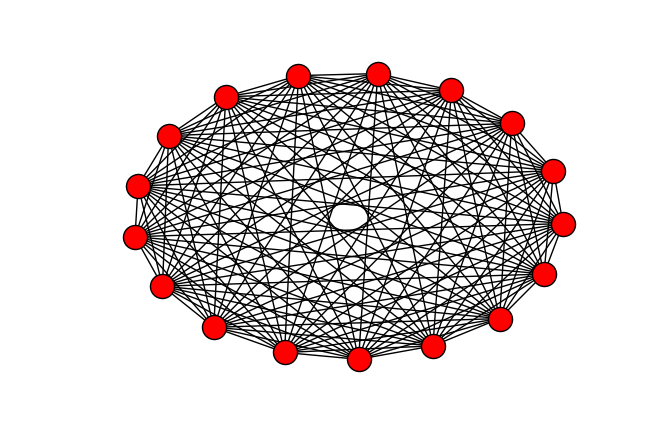

[('Irani described Tudor as a "world-class signing".', 'This is a new start for me and I am just itching to get out on the field," he said.'), ('Irani described Tudor as a "world-class signing".', '"If all goes well then hopefully we will be talking about Alex Tudor in the future as an Essex and England player."'), ('Irani described Tudor as a "world-class signing".', "Even if I didn't sign he just wanted to get me back on the cricket field."), ('Irani described Tudor as a "world-class signing".', 'Tudor given fresh start by Essex\n\nFormer England paceman Alex Tudor has joined Essex on a one-year contract.'), ('Irani described Tudor as a "world-class signing".', 'The 27-year-old, who 10 Test caps, was released by Surrey at the end of last season after 10 years at The Oval.'), ('Irani described Tudor as a "world-class signing".', "The signing was also welcomed by coach Graham Gooch, who was England manager on Tudor's first tour to Australia in 1998-99."), ('Irani described Tudor as a "

In [49]:
file = '../datasets/bbc/cricket/012.txt'
threshold = 0.25
myN = 10

with open(file, "r") as f:
    data = f.read()

sent_tokens, word_tokens = tokenize(data)

words = list(set(get_words(data)))

N = len(sent_tokens)

idf = calc_idf(word_tokens, words, N)

matrix = get_similarity_matrix(word_tokens, idf)
print ("Printing similarity matrix:\n", matrix)

gr = build_graph(sent_tokens, threshold, idf)

keysentences = get_keysentences(gr)
print ("Printing Top 10 Key sentences:\n",keysentences[:myN])

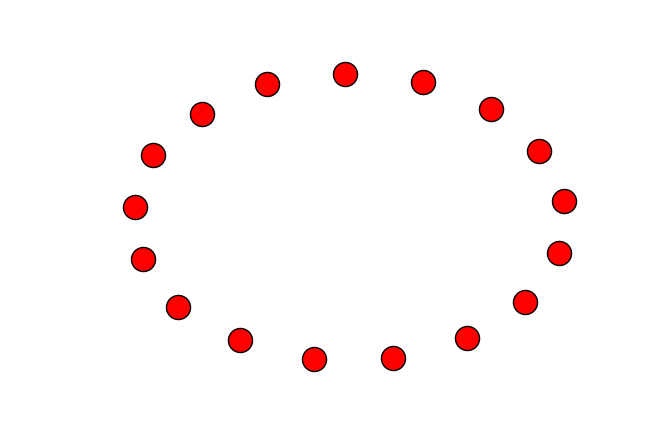

In [30]:
# pos=nx.get_node_attributes(gr, 'pos')
pos=nx.spring_layout(gr)
nx.draw(gr, pos)
w_labels = nx.get_edge_attributes(gr, 'weight')
# w_labels = dict((node, round(weight, 3)) for node, weight in w_labels.items())
# print(w_labels)
# get_node_attributes
# nx.draw_networkx_labels(gr, pos, font_size=8)
nx.draw_networkx_edge_labels(gr, pos, edge_labels=w_labels, font_size=4)
plt.show()
